In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [128]:
df_train = pd.read_csv('../b_podaci_1/all-KWs-all-metrics/01-02sep-26aug-all-kws-all-metrics.csv', skiprows = 2, skipfooter = 5)
df_train = pd.read_csv('/tmp/all-kws-all-metrics_filtered.csv')


In [3]:
no_value = df_train['Avg. pos.'][0]
df_train['Avg. pos.'] = df_train['Avg. pos.'].replace({no_value:np.nan})

In [4]:
df_train = df_train.dropna(subset=['Avg. pos.',])

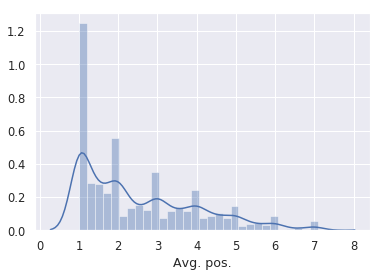

In [129]:
pd.set_option('display.max_columns', 100)
df_train['Avg. pos.'] = pd.to_numeric(df_train['Avg. pos.'], errors='coerce')
sns.distplot(df_train['Avg. pos.'])

In [130]:
# remove '%' from values
ccc = ['Search impr. share', 'Search top IS', 'Search abs. top IS', 'Search exact match IS',
       'Search lost IS (rank)', 'Search lost top IS (rank)', 'Search lost abs. top IS (rank)',
       'Interaction rate', 'All conv. rate', 'Conv. rate (current model)',
       'Impr. (Abs. Top) %', 'Impr. (Top) %', 'CTR', 'Conv. rate']

for c in ccc:
    df_train[c] = df_train[c].str.replace('%','')

In [131]:
df_train = df_train.replace({no_value:np.nan})

In [132]:
total = df_train.isna().sum().sort_values(ascending=False)
percent = (df_train.isna().sum()/df_train.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Final URL suffix,11345,1.000000
Bid strategy,11345,1.000000
Cross-device conv.,11345,1.000000
Mobile final URL,11345,1.000000
Tracking template,11345,1.000000
Custom parameter,11345,1.000000
Final URL,11345,1.000000
Chat rate,11345,1.000000
Value / conv. (current model),10031,0.884178
Cost / conv. (current model),10031,0.884178


In [133]:
#drop columns with a lot of NaNs
df_train = df_train.drop(columns=['Final URL', 'Custom parameter', 'Tracking template',
       'Final URL suffix', 'Cross-device conv.', 'Mobile final URL',
       'Chat rate', 'Bid strategy', 'Cost / conv. (current model)',
       'Value / conv. (current model)', 'Value / all conv.',
       'Cost / all conv.', 'Est. add. cost/wk (top page bid)',
       'Est. add. cost/wk (first position bid)', '% new sessions',
       'Avg. session duration (seconds)', 'Pages / session', 'Bounce rate',
       'Click share',])

# drop non needed columns
df_train = df_train.drop(columns=['Keyword status', 'Keyword', 'Campaign',
    'Ad group', 'Currency code',
       'Status', 'Campaign type', 'Policy details', 'Label', 'Match type',
       'Bid strategy type', 'Campaign ID', 'Ad group ID', 'Keyword ID'])

df_train = df_train.drop(columns=['View-through conv.', 'Message impr.', 'Chats', 'PTR', 'Phone calls',
       'Est. add. clicks/wk (+50% bid)',])

# drop "average/above average columns"
df_train = df_train.drop(columns=['Exp. CTR', 'Exp. CTR (hist.)', 'Landing page exp.',
                                  'Landing page exp. (hist.)', 'Ad relevance', 'Ad relevance (hist.)',])

In [134]:
cols = df_train.columns
df_train[cols] = df_train[cols].apply(pd.to_numeric, errors='coerce')

In [135]:
total = df_train.isna().sum().sort_values(ascending=False)
percent = (df_train.isna().sum()/df_train.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Avg. cost,8056,0.710093
All conv. rate,8056,0.710093
All conv. value / click,8056,0.710093
Avg. CPC,8056,0.710093
Conv. rate (current model),8056,0.710093
Conv. value / click (current model),8056,0.710093
Conv. value / cost (current model),8056,0.710093
All conv. value / cost,8056,0.710093
Est. add. clicks/wk (first position bid),6532,0.575760
Est. add. clicks/wk (top page bid),6526,0.575231


In [136]:
df_train.to_csv('/tmp/all-KWs-all-metrics-all-3.csv')

In [137]:
na_rows = df_train.isna().sum(axis=1).sort_values(ascending=False)

In [138]:
type(df_train['Avg. CPC'][6])

numpy.float64

In [139]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

df_train_full = imp.fit_transform(df_train)

In [140]:
df_train_full_pd = pd.DataFrame(data=df_train_full, index=df_train.index, columns = df_train.columns)

In [157]:
df_train_full_pd = df_train_full_pd.drop(columns=['Unnamed: 0'])

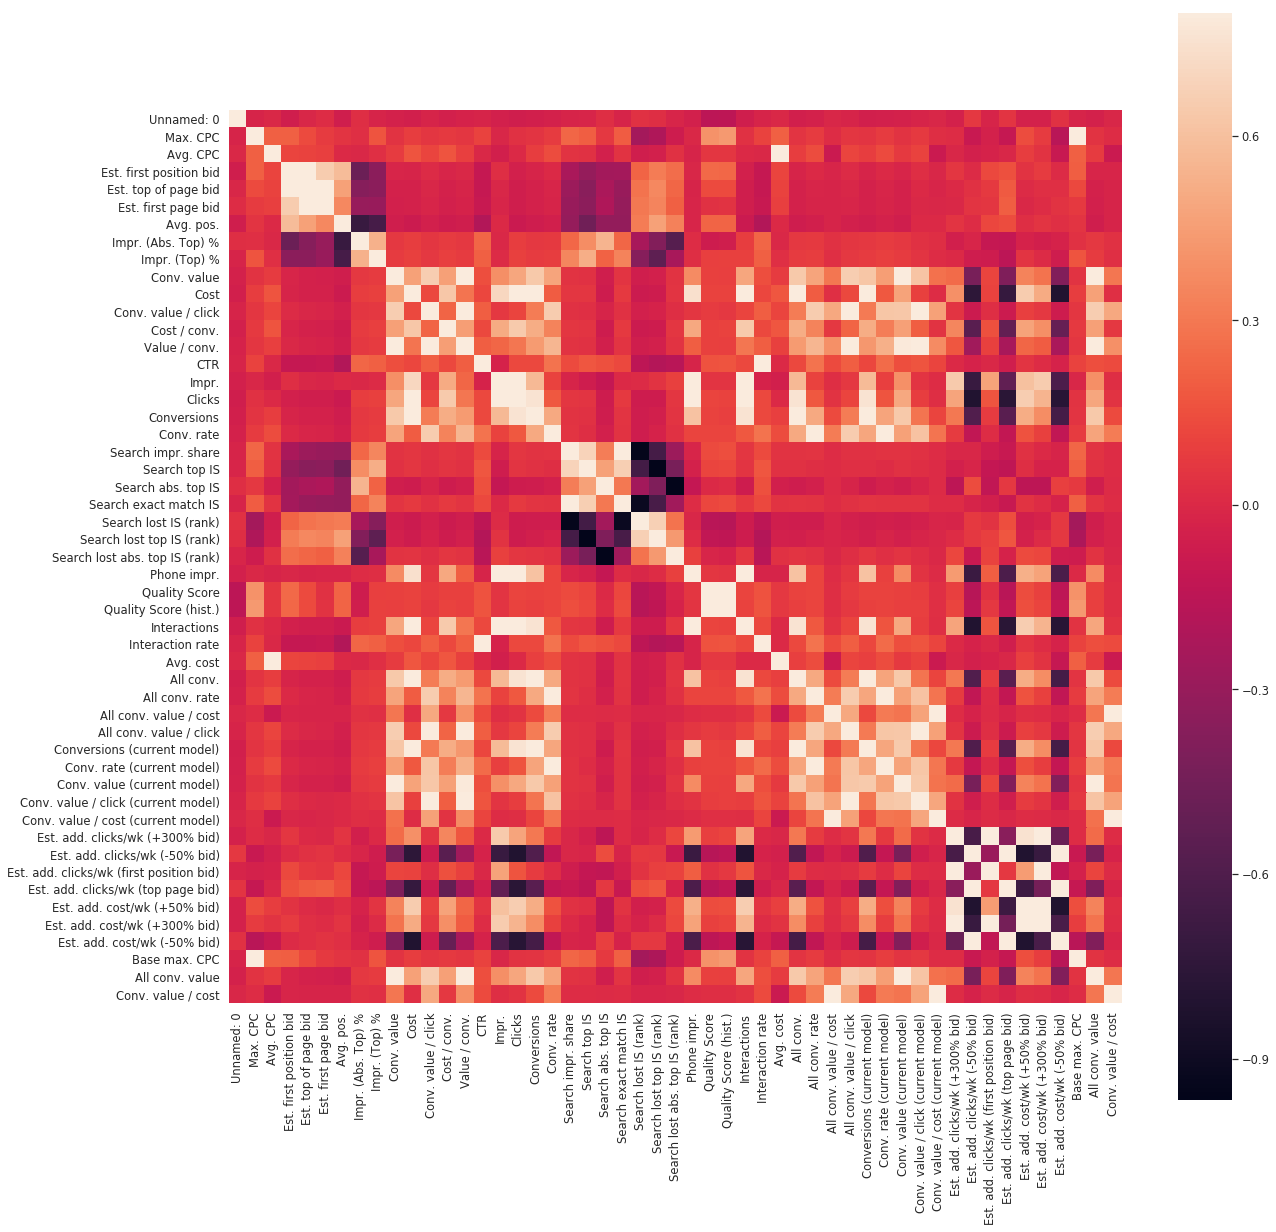

In [149]:
#correlation matrix
corrmat = df_train_full_pd.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

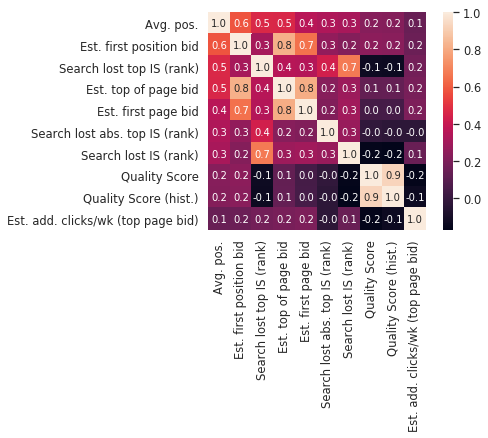

In [150]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Avg. pos.')['Avg. pos.'].index
cm = np.corrcoef(df_train_full_pd[cols].values.T)
sns.set(font_scale=1.05)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

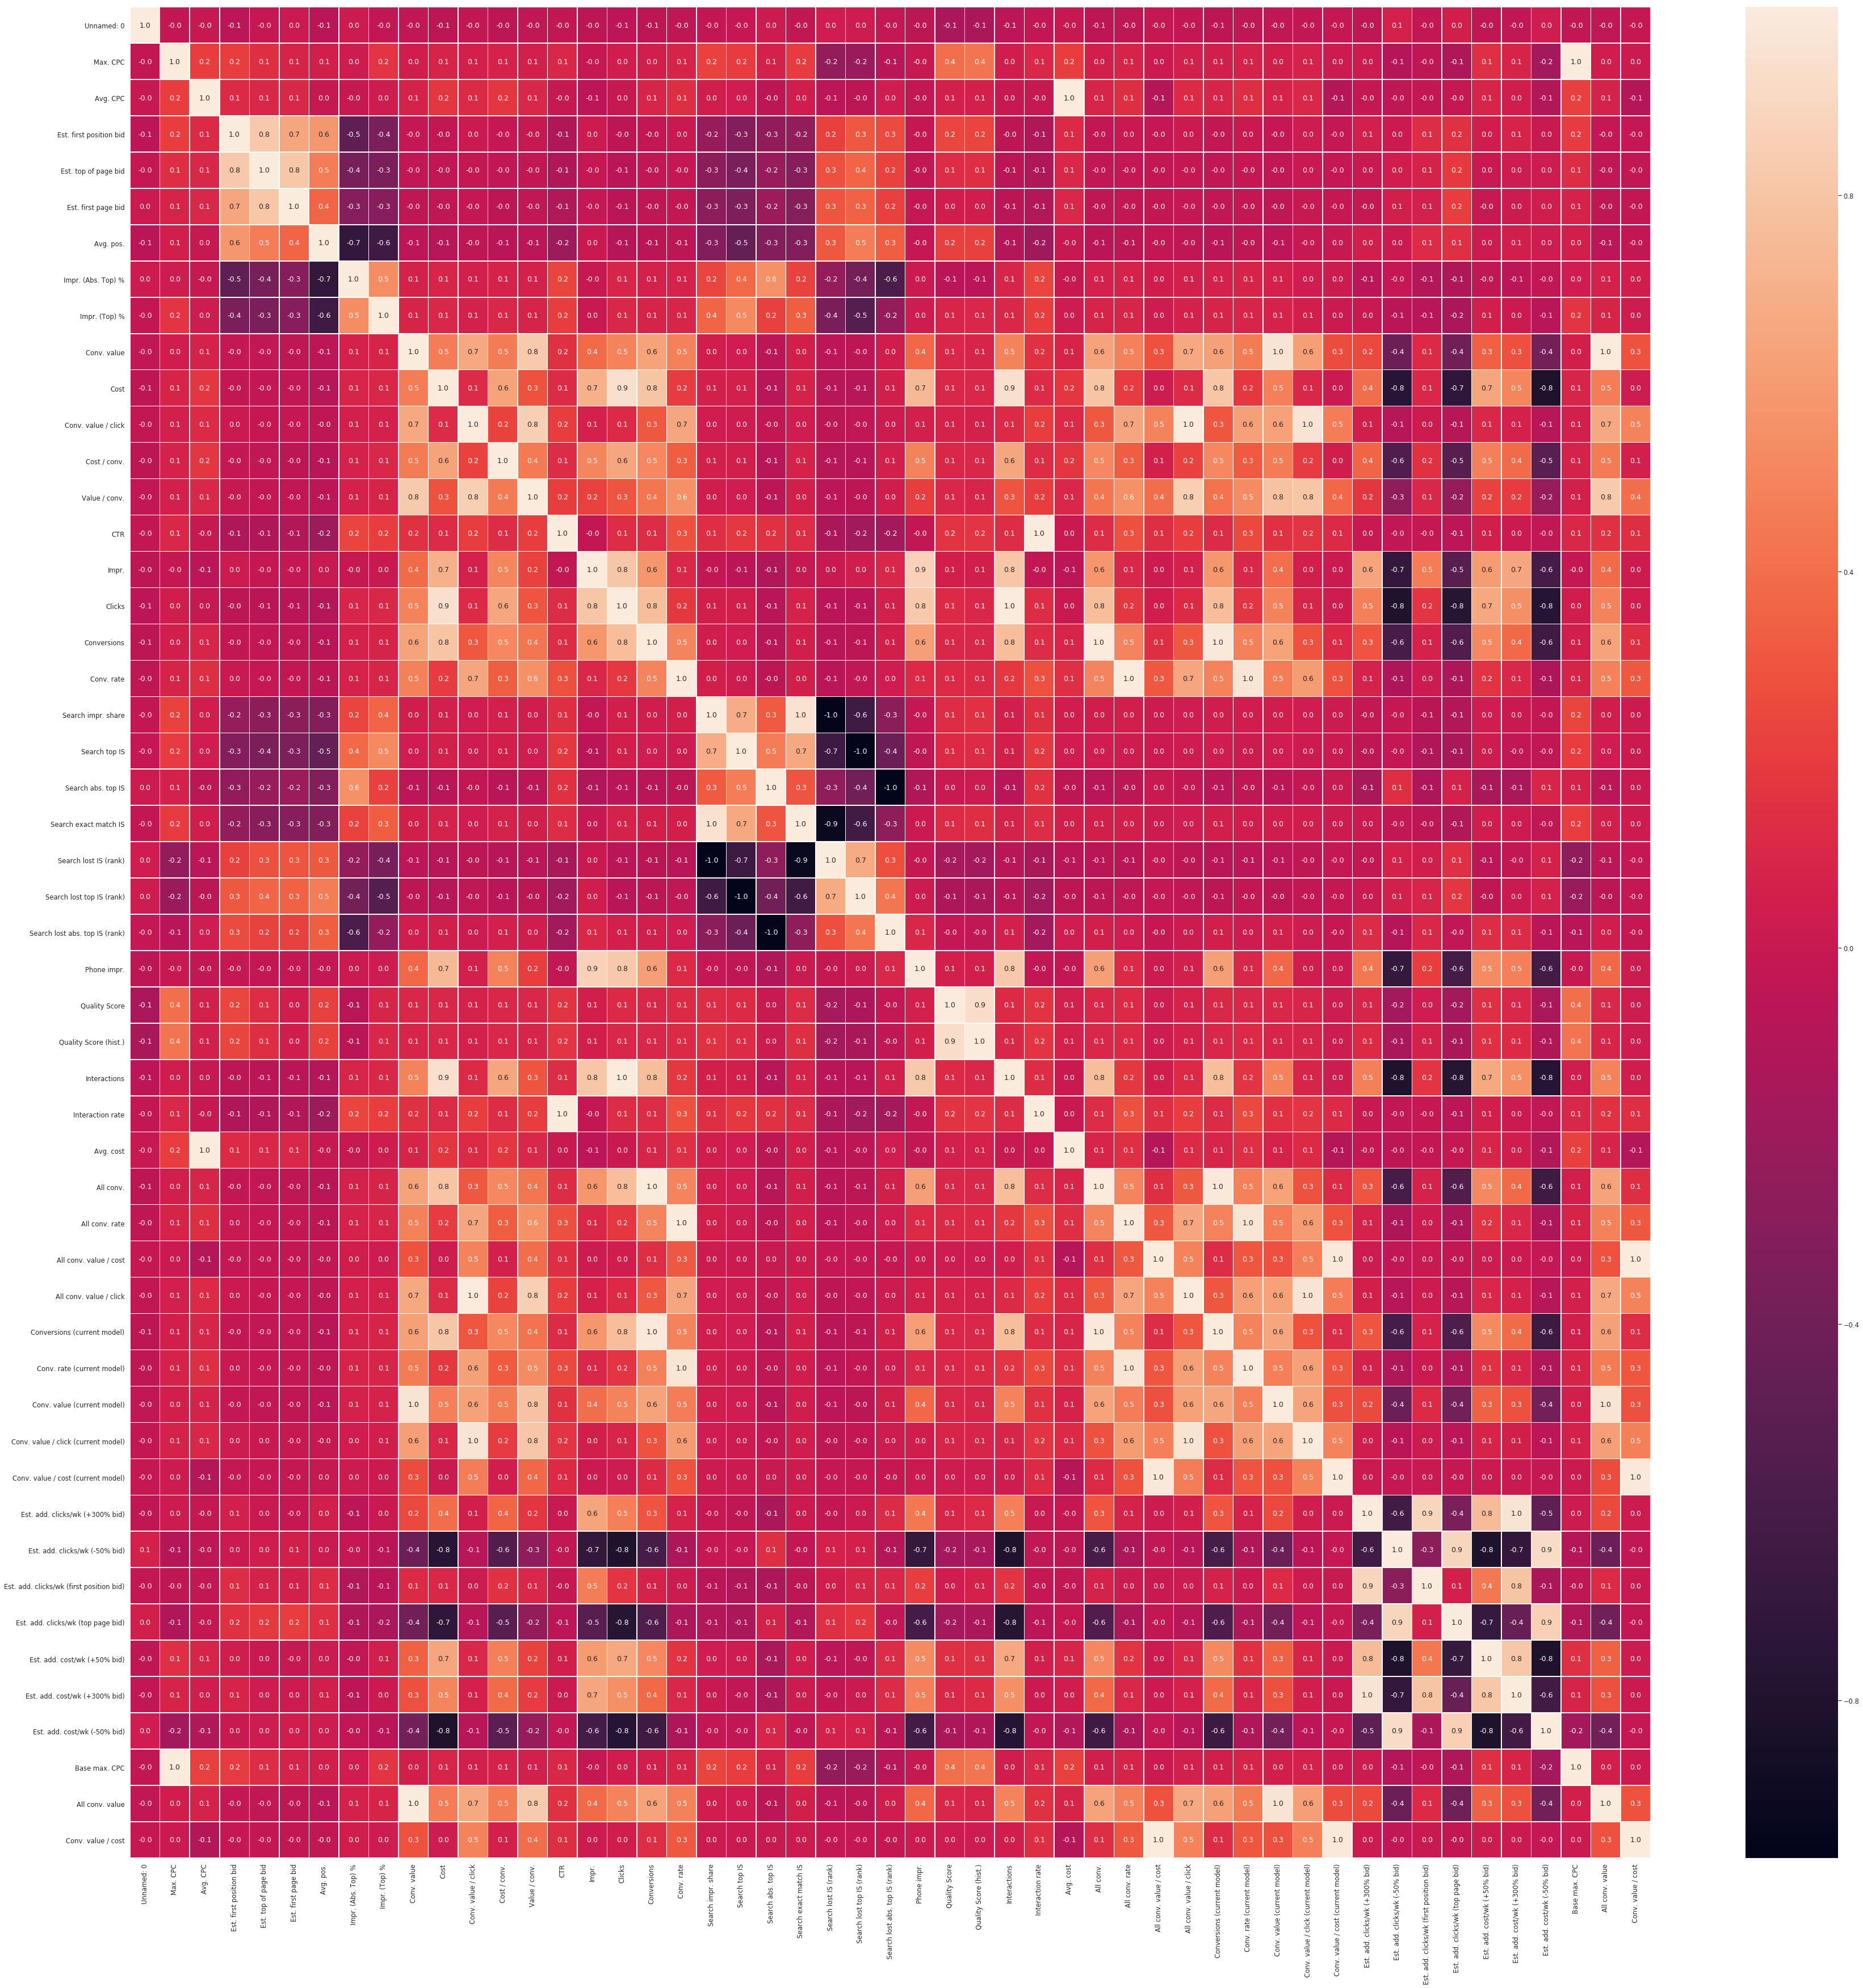

In [151]:
#correlation map
f,ax = plt.subplots(figsize=(60, 60))
sns.heatmap(corrmat, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [38]:
sns.set()

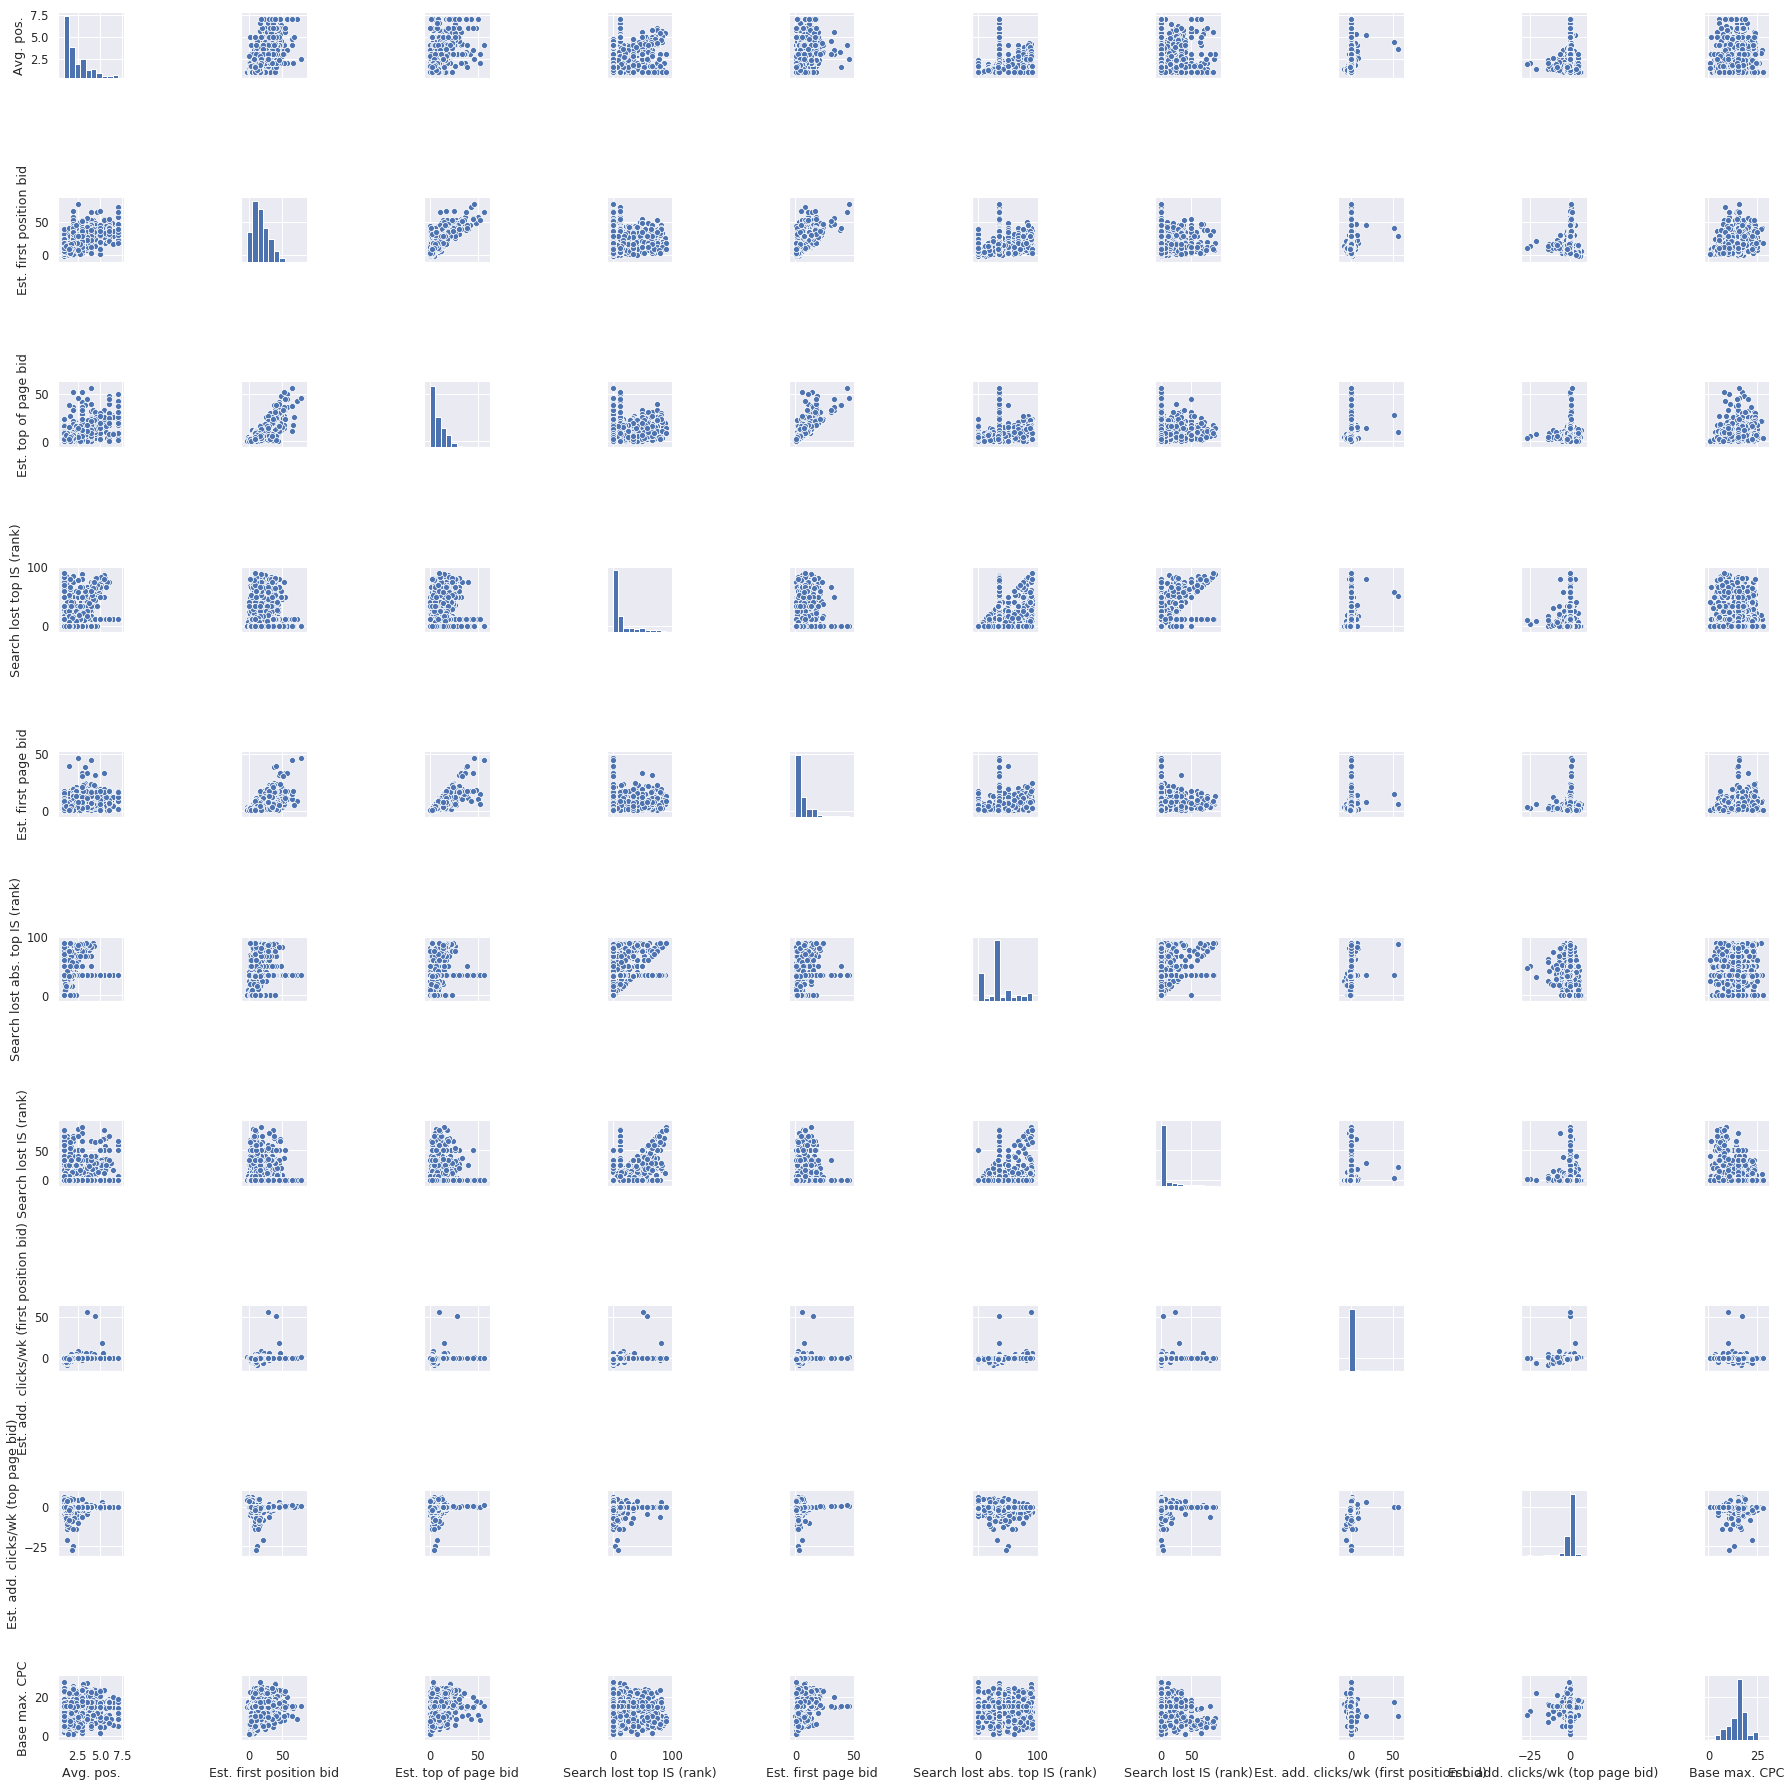

In [59]:
sns.pairplot(df_train_full_pd[cols].fillna(0), size = 2.5)
plt.show();

In [158]:
# Get training and test sets
from sklearn.model_selection import train_test_split
X = df_train_full_pd[df_train_full_pd.loc[:, df_train_full_pd.columns != 'Avg. pos.'].columns]
y = df_train_full_pd['Avg. pos.']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [315]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81dfbd38d0>]],
      dtype=object)

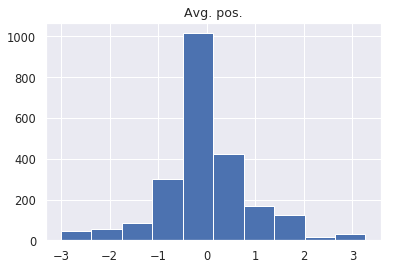

In [317]:
y_test_predict = regr.predict(X_test)
y_train_pred = regr.predict(X_train)
pd.DataFrame(y_test - y_test_predict).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81e527fb38>]],
      dtype=object)

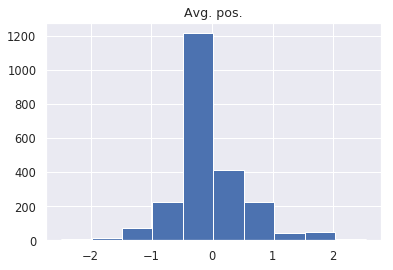

In [314]:
pd.DataFrame(y_test - y_test_predict).hist()

In [247]:
# Apply Box-Cox transformation
from scipy.stats import boxcox

# Rescale data
from sklearn.preprocessing import MinMaxScaler, scale
scaler = MinMaxScaler()

TypeError: scale() missing 1 required positional argument: 'X'

In [250]:
X_train_transformed = X_train.copy()
#X_train_transformed['Max. CPC'] = boxcox(X_train_transformed['Max. CPC'] + 1)[0]
X_train_transformed_scaled = scale(X_train_transformed)
#X_train_transformed_scaled = scaler.fit_transform(X_train_transformed)

In [251]:
X_test_transformed = X_test.copy()
#X_test_transformed['Max. CPC'] = boxcox(X_test_transformed['Max. CPC'] + 1)[0]
X_test_transformed_scaled = scale(X_test_transformed)
#X_test_transformed_scaled = scaler.fit_transform(X_test_transformed)

In [274]:
from sklearn.preprocessing import StandardScaler

# Standardize the data (mean=0, std=1) using training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

# Apply scaler on training and test data
standardized_X_train = X_scaler.transform(X_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

In [249]:
X_train_transformed_scaled

array([[0.70098218, 0.26927985, 0.4674901 , ..., 0.70098218, 0.04204206,
        0.        ],
       [0.46453256, 0.1970172 , 0.28571429, ..., 0.46453256, 0.04204206,
        0.        ],
       [0.41369821, 0.1970172 , 0.49079469, ..., 0.41461338, 0.04204206,
        0.        ],
       ...,
       [0.42276619, 0.19701719, 0.62712654, ..., 0.40276224, 0.04204206,
        0.        ],
       [0.42094065, 0.19701719, 0.28571429, ..., 0.40072057, 0.04204206,
        0.        ],
       [0.28628592, 0.1970172 , 0.43486367, ..., 0.28732674, 0.04204206,
        0.        ]])

In [252]:

# Put this when it's called
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [298]:
# Fit model
lr = LinearRegression()
lr.fit(standardized_X_train, standardized_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [299]:
from sklearn.metrics import mean_squared_error, make_scorer

In [300]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, standardized_X_train, standardized_y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, standardized_X_test, standardized_y_test, scoring = scorer, cv = 10))
    return(rmse)

In [301]:
# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(standardized_X_train)
y_test_pred = lr.predict(standardized_X_test)

RMSE on Training set : 0.5207512364007505
RMSE on Test set : 0.8463115055321003


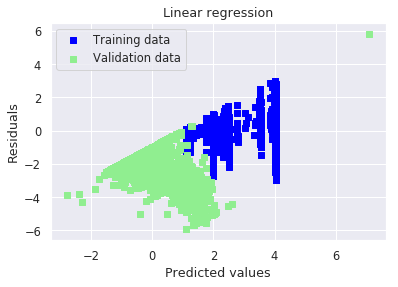

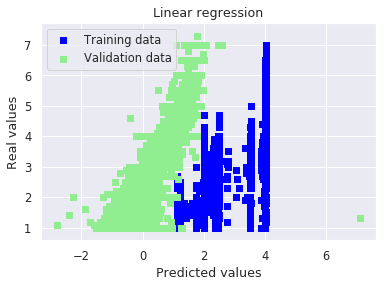

In [318]:
# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

In [272]:
pd.DataFrame(y_test_pred).min()

0   -1.599269
dtype: float64

Best alpha : 3.0
Try again for more precision with alphas centered around 3.0
Best alpha : 4.199999999999999
Ridge RMSE on Training set : 0.7669918236413056
Ridge RMSE on Test set : 1.0345659982618483


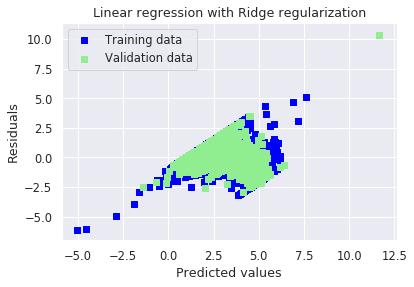

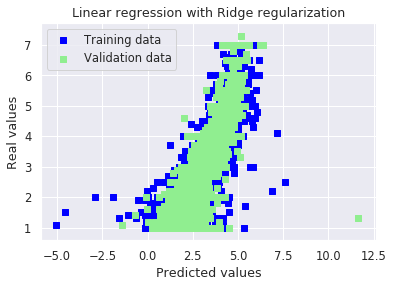

Ridge picked 49 features and eliminated the other 0 features


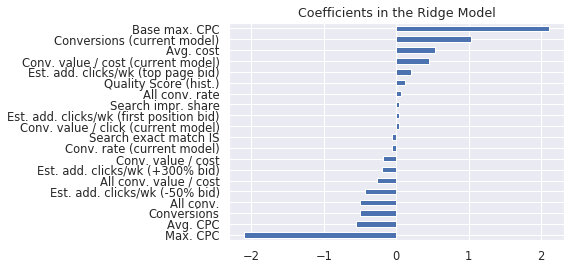

In [273]:
# 2* Ridge
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [225]:
ydf = pd.DataFrame((y_test - y_test_rdg).abs())

ydf[ydf > 0.5].count()

Avg. pos.    856
dtype: int64

Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006
Best alpha : 0.0007499999999999999
Lasso RMSE on Training set : 0.5620595922609383
Lasso RMSE on Test set : 0.5391022773343351


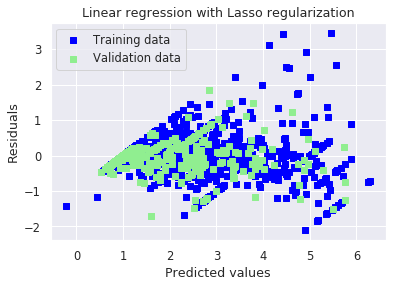

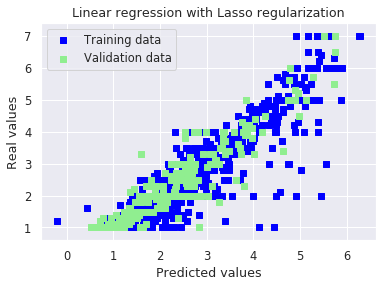

Lasso picked 42 features and eliminated the other 7 features


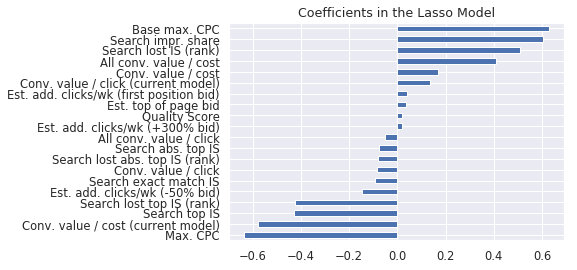

In [125]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [126]:
y_test_las.max()


5.756033161708338

In [127]:
y_test.max()

7.0

In [ ]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()